<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/05_Image_Convolution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="tartalom"></a>

# 2 Dimenziós konvolúció
---
Az 1-dimenziós konvolúcióhoz hasonlóan most a kétdimenziós változatával fogok foglalkozni

In [63]:
#@title
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo)
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.25, 0.5))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.25, 1, 0, 0.5))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.25, 1, 0.5))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import imageio
import skimage
import skimage.io

from numba import jit, prange

import warnings
warnings.filterwarnings('ignore')

In [9]:
M, N = 7, 7
x = np.zeros((M, N))
x[M//2, N//2] = 1
h = np.arange(9).reshape(3, 3) + 1

$$ \large \displaystyle
(h*x)[n_1, n_2]=\sum_{k_1=-\infty}^{\infty}\sum_{k_2=-\infty}^{\infty}h(k_1, k_2)x(n_1-k_1,n_2-k_2)
$$

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] bemenet

[[1 2 3]
 [4 5 6]
 [7 8 9]] 		 kernel

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 9. 8. 7. 0. 0.]
 [0. 0. 6. 5. 4. 0. 0.]
 [0. 0. 3. 2. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] konvolúció



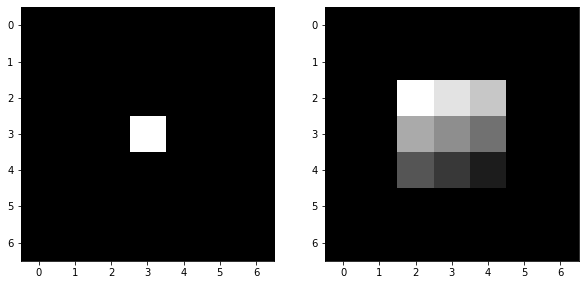

In [18]:
@jit(nopython=True, parallel=True)
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    # Kernel radius
    rh, rw = np.array(h.shape)//2
    # Init output
    output = np.zeros(x.shape)
    for n1 in prange(rh, xh-rh):
        for n2 in prange(rw, xw-rw):
            value = 0
            for k1 in prange(hh):
                for k2 in prange(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

c = convolve(x, h)

print(x, end=' bemenet\n\n')
print(h, end=' \t\t kernel\n\n')
print(c, end=' konvolúció\n\n')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(x, cmap = 'gray')
ax2.imshow(c, cmap = 'gray')
plt.show()

In [35]:
image = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

In [36]:
type(image)

numpy.ndarray

In [37]:
image.shape

(1024, 1024, 3)

In [38]:
red = image[:,:,1]

In [39]:
red.shape

(1024, 1024)

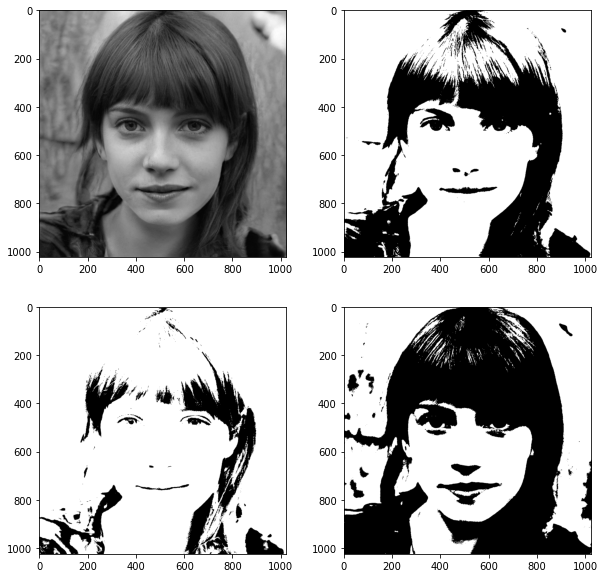

In [60]:
red_1 = red.copy()
red_2 = red.copy()
red_3 = red.copy()

red_1[red_1 <  60] = 0
red_1[red_1 >= 60] = 255

red_2[red_2 <  30] = 0
red_2[red_2 >= 30] = 255

red_3[red_3 <  90] = 0
red_3[red_3 >= 90] = 255

fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0, 0].imshow(red, cmap = 'gray');
ax[0, 1].imshow(red_1, cmap = 'gray');
ax[1, 0].imshow(red_2, cmap = 'gray');
ax[1, 1].imshow(red_3, cmap = 'gray');

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] bemenet

[[-1  2 -1]
 [ 0  1  0]
 [ 0  1  0]] 		 kernel

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]] konvolúció



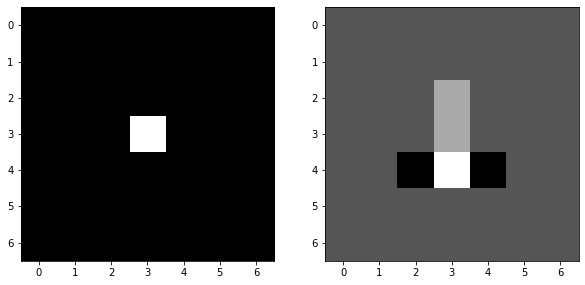

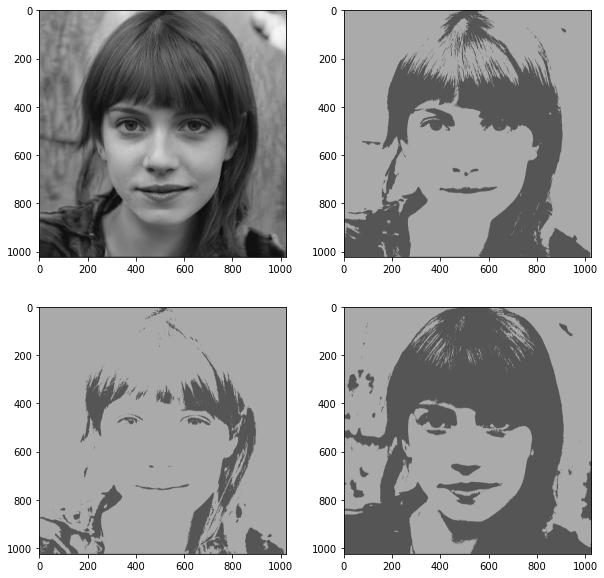

In [59]:
h = np.array([[-1,2,-1],[0,1,0],[0,1,0]])

c = convolve(x, h)

print(x, end=' bemenet\n\n')
print(h, end=' \t\t kernel\n\n')
print(c, end=' konvolúció\n\n')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(x, cmap = 'gray')
ax2.imshow(c, cmap = 'gray')
plt.show()

c = convolve(red, h)
c1 = convolve(red_1, h)
c2 = convolve(red_2, h)
c3 = convolve(red_3, h)


fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0, 0].imshow(c, cmap = 'gray');
ax[0, 1].imshow(c1, cmap = 'gray');
ax[1, 0].imshow(c2, cmap = 'gray');
ax[1, 1].imshow(c3, cmap = 'gray');
plt.show()

## Filter
---
*discrete convolution* a képen

In [61]:
image = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

img_in = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')/255
img_in = np.median(img_in, axis=2)

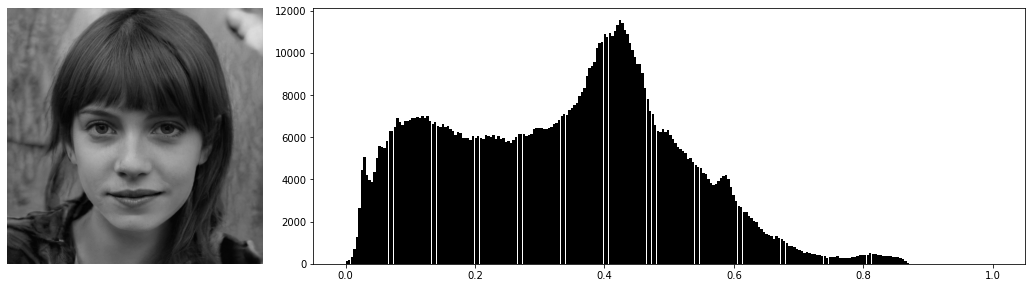

In [64]:
histogram(img_in, interval=[0, 1])

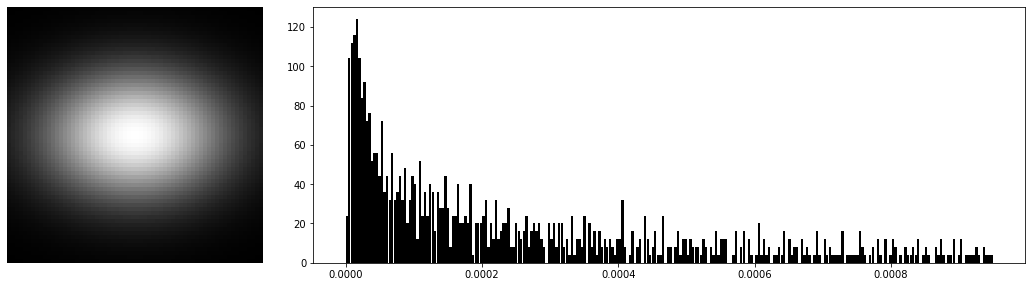

In [78]:
# Kernel
size = 64j
u, v = np.mgrid[-1:1:size, -1:1:size]
radial = (2*u**2 + v**2)**0.5
kernel = np.exp(-2*radial**2)
kernel /= kernel.sum()
histogram(kernel, interval=[0, kernel.max()])

1327104
1048576


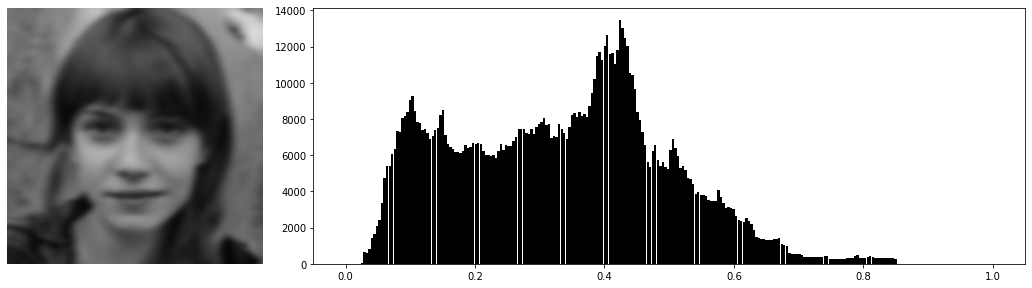

CPU times: user 12 s, sys: 8.17 ms, total: 12 s
Wall time: 6.49 s


In [77]:
%%time
r = int(size.imag)
# Padding zero
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)
# Convolution
conv2d = convolve(img_pad, kernel)[r:-r, r:-r]
histogram(conv2d,interval=[0, 1])

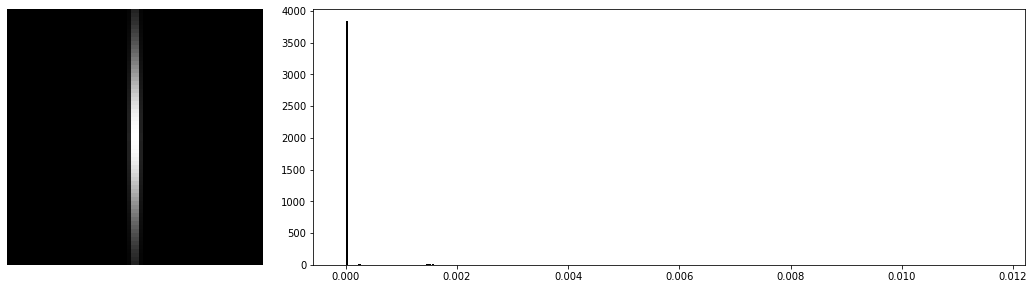

In [84]:
# Kernel
size = 64j
u, v = np.mgrid[-1:1:size, -1:1:size]
radial = (1*u**2 + 500*v**2)**0.5
kernel = np.exp(-2*radial**2)
kernel /= kernel.sum()
histogram(kernel, interval=[0, kernel.max()])

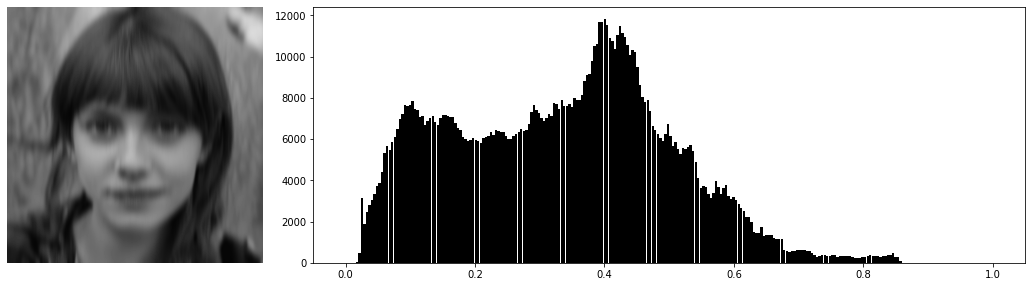

CPU times: user 21.1 s, sys: 17.5 ms, total: 21.1 s
Wall time: 11.2 s


In [85]:
%%time
r = int(size.imag)
# Padding zero
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)
# Convolution
conv2d = convolve(img_pad, kernel)[r:-r, r:-r]
histogram(conv2d,interval=[0, 1])


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


Digitális Tankönyvtára - Digitális jelfeldolgozás - Dr. Fodor Dénes (2014)
<br>
https://regi.tankonyvtar.hu/hu/tartalom/tamop412A/2011-0042_digitalis_jelfeldolgozas/ch04s03.html

ELTE Természettudományi Kar, Nagy Sándor - 'Konvolúció'
<br>
http://nagysandor.eu/AsimovTeka/convolution/index.html


------------

[1]
Debreceni Egyetem, Informatikai Kar, Kovács György - 'A jelfeldolgozás matematikai alapjai'
<br>
https://gyires.inf.unideb.hu/GyBITT/02/ch06s05.html

[2]
Ertedmar.hu - 'Konvolúcióról érthetően'
<br>
https://ertedmar.hu/cikkek/konvolucio

------------
Structural Medicine - Convolution
<br>
https://www-structmed.cimr.cam.ac.uk/Course/Convolution/convolution.html#commut


Digital Image Processing - Spatial Filtering
<br>
https://www.slideshare.net/gichelleamon/5-spatial-filtering-p1
